# Notebook to create the feature engineering dataset

## Section Imports and datasets loading

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import pointbiserialr

players = pd.read_csv('players_teams2.csv', delimiter=",")
teams = pd.read_csv('basketballPlayoffs/teams.csv', delimiter=",")
coaches = pd.read_csv('coaches_final.csv', delimiter=",")
feat_eng_2 = pd.read_csv('filtered/team2_before_shift.csv', delimiter=",")

/home/ze/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Calculate Average PowerRanking for Teams

### Overview
This section focuses on deriving the average ``PowerRanking``, ``PostPowerRanking``, ``PER`` and ``PostPER`` for teams in a specific year based on the mean of individual ranks of each player in that team and year. This process involves:


1. **Initialize Dictionary:** Create empty dictionaries, ``dict_PowerRanking``, ``dict_PER``, ``dict_postPowerRanking``, ``dict_postPER`` to store calculated results.
2. **Iterate Through Players Data:**
   - For each player, extract team ID, year, and their rank.
   - Check if the team (tmID) is already in the dictionary.
      - If present, update the count and sum for the corresponding year.
      - If the year is not present, add a new entry for the team and year.
   - If the team is not in the dictionary, add a new entry for the team.
3. **Resulting Dictionary Format:** 
   - {team:[[year, count_players, sum_players_ranking]]}

### Example Output
- **Team: ABC**
  - Year: 2021, Count Players: 3, Sum Players Performance: 245.67
  - Year: 2022, Count Players: 2, Sum Players Performance: 150.45
  - ...


### Dictionary for team average PowerRanking

In [2]:

# Initialize an empty dictionary to store the results
dict_PowerRanking = {}



# Iterate through each row in the 'players' DataFrame
for index, row in players.iterrows():
    
    tmID = row['tmID']
    year = row['year']
    playerPowerRanking = row['playerPowerRanking']

    # Check if the team (tmID) is already in the dictionary
    if tmID in dict_PowerRanking:
        # If the year is already present, update the count and sum
        if any(entry[0] == year for entry in dict_PowerRanking[tmID]):
            for entry in dict_PowerRanking[tmID]:
                if entry[0] == year:
                    entry[1] += 1  # Increment count of players
                    entry[2] += playerPowerRanking  # Add playerPowerRanking to sum
        else:
            # If the year is not present, add a new entry
            dict_PowerRanking[tmID].append([year, 1, playerPowerRanking])
    else:
        # If the team is not in the dictionary, add a new entry
        dict_PowerRanking[tmID] = [[year, 1, playerPowerRanking]]

# Print the resulting dictionary
for team, data in dict_PowerRanking.items():
    print(f'Team: {team}')
    for entry in data:
        print(f'Year: {entry[0]}, Count Players: {entry[1]}, Sum Players Performance: {entry[2]}')
    print('---')


Team: MIN
Year: 2, Count Players: 12, Sum Players Performance: 360.56627461516257
Year: 3, Count Players: 12, Sum Players Performance: 315.17891842928043
Year: 4, Count Players: 11, Sum Players Performance: 319.8707777147881
Year: 5, Count Players: 12, Sum Players Performance: 330.7608726802663
Year: 6, Count Players: 15, Sum Players Performance: 360.2122417487438
Year: 7, Count Players: 11, Sum Players Performance: 330.3582591823621
Year: 8, Count Players: 12, Sum Players Performance: 361.4501524234381
Year: 9, Count Players: 15, Sum Players Performance: 397.19163095543854
Year: 10, Count Players: 13, Sum Players Performance: 421.38819268140486
Year: 1, Count Players: 13, Sum Players Performance: 336.962333688039
---
Team: CON
Year: 9, Count Players: 13, Sum Players Performance: 381.5685039410692
Year: 7, Count Players: 14, Sum Players Performance: 396.62787945674233
Year: 10, Count Players: 14, Sum Players Performance: 415.9371930240966
Year: 4, Count Players: 11, Sum Players Perform

### Dictionary for team average PER

In [3]:
# Initialize an empty dictionary to store the results
dict_PER = {}

players = pd.read_csv('players_teams2.csv')

# Iterate through each row in the 'players' DataFrame
for index, row in players.iterrows():
    
    tmID = row['tmID']
    year = row['year']
    playerPowerRanking = row['PER']

    # Check if the team (tmID) is already in the dictionary
    if tmID in dict_PER:
        # If the year is already present, update the count and sum
        if any(entry[0] == year for entry in dict_PER[tmID]):
            for entry in dict_PER[tmID]:
                if entry[0] == year:
                    entry[1] += 1  # Increment count of players
                    entry[2] += playerPowerRanking  # Add playerPowerRanking to sum
        else:
            # If the year is not present, add a new entry
            dict_PER[tmID].append([year, 1, playerPowerRanking])
    else:
        # If the team is not in the dictionary, add a new entry
        dict_PER[tmID] = [[year, 1, playerPowerRanking]]

# Print the resulting dictionary
for team, data in dict_PER.items():
    print(f'Team: {team}')
    for entry in data:
        print(f'Year: {entry[0]}, Count Players: {entry[1]}, Sum Players PER: {entry[2]}')
    print('---')


Team: MIN
Year: 2, Count Players: 12, Sum Players PER: 101.75268195767244
Year: 3, Count Players: 12, Sum Players PER: 86.95617754461273
Year: 4, Count Players: 11, Sum Players PER: 109.37041128693623
Year: 5, Count Players: 12, Sum Players PER: 107.41078951021024
Year: 6, Count Players: 15, Sum Players PER: 81.03771961300058
Year: 7, Count Players: 11, Sum Players PER: 117.70028151468404
Year: 8, Count Players: 12, Sum Players PER: 116.68360836432076
Year: 9, Count Players: 15, Sum Players PER: 151.08350957737676
Year: 10, Count Players: 13, Sum Players PER: 153.82217984599106
Year: 1, Count Players: 13, Sum Players PER: 115.21141375656724
---
Team: CON
Year: 9, Count Players: 13, Sum Players PER: 162.25742506086058
Year: 7, Count Players: 14, Sum Players PER: 165.01758975594518
Year: 10, Count Players: 14, Sum Players PER: 165.92998106789994
Year: 4, Count Players: 11, Sum Players PER: 110.77477424077564
Year: 5, Count Players: 11, Sum Players PER: 118.3890658414859
Year: 6, Count Pl

### Dictionary for team average Post PowerRanking

In [4]:
# Initialize an empty dictionary to store the results
dict_postPowerRanking = {}

players = pd.read_csv('players_teams2.csv')

# Iterate through each row in the 'players' DataFrame
for index, row in players.iterrows():
    
    tmID = row['tmID']
    year = row['year']
    playerPowerRanking = row['postPlayerPowerRanking']

    # Check if the team (tmID) is already in the dictionary
    if tmID in dict_postPowerRanking:
        # If the year is already present, update the count and sum
        if any(entry[0] == year for entry in dict_postPowerRanking[tmID]):
            for entry in dict_postPowerRanking[tmID]:
                if entry[0] == year:
                    entry[1] += 1  # Increment count of players
                    entry[2] += playerPowerRanking  # Add playerPowerRanking to sum
        else:
            # If the year is not present, add a new entry
            dict_postPowerRanking[tmID].append([year, 1, playerPowerRanking])
    else:
        # If the team is not in the dictionary, add a new entry
        dict_postPowerRanking[tmID] = [[year, 1, playerPowerRanking]]

# Print the resulting dictionary
for team, data in dict_postPowerRanking.items():
    print(f'Team: {team}')
    for entry in data:
        print(f'Year: {entry[0]}, Count Players: {entry[1]}, Sum Players post PowerRanking: {entry[2]}')
    print('---')


Team: MIN
Year: 2, Count Players: 12, Sum Players post PowerRanking: 0.0
Year: 3, Count Players: 12, Sum Players post PowerRanking: 0.0
Year: 4, Count Players: 11, Sum Players post PowerRanking: 194.62506483802582
Year: 5, Count Players: 12, Sum Players post PowerRanking: 167.91884917239025
Year: 6, Count Players: 15, Sum Players post PowerRanking: 0.0
Year: 7, Count Players: 11, Sum Players post PowerRanking: 0.0
Year: 8, Count Players: 12, Sum Players post PowerRanking: 0.0
Year: 9, Count Players: 15, Sum Players post PowerRanking: 0.0
Year: 10, Count Players: 13, Sum Players post PowerRanking: 0.0
Year: 1, Count Players: 13, Sum Players post PowerRanking: 0.0
---
Team: CON
Year: 9, Count Players: 13, Sum Players post PowerRanking: 220.99854090857423
Year: 7, Count Players: 14, Sum Players post PowerRanking: 265.3603873507785
Year: 10, Count Players: 14, Sum Players post PowerRanking: 0.0
Year: 4, Count Players: 11, Sum Players post PowerRanking: 251.19056805594298
Year: 5, Count Pla

### Dictionary for team average Post PER

In [5]:
# Initialize an empty dictionary to store the results
dict_postPER = {}

players = pd.read_csv('players_teams2.csv')

# Iterate through each row in the 'players' DataFrame
for index, row in players.iterrows():
    
    tmID = row['tmID']
    year = row['year']
    playerPowerRanking = row['postPER']

    # Check if the team (tmID) is already in the dictionary
    if tmID in dict_postPER:
        # If the year is already present, update the count and sum
        if any(entry[0] == year for entry in dict_postPER[tmID]):
            for entry in dict_postPER[tmID]:
                if entry[0] == year:
                    entry[1] += 1  # Increment count of players
                    entry[2] += playerPowerRanking  # Add playerPowerRanking to sum
        else:
            # If the year is not present, add a new entry
            dict_postPER[tmID].append([year, 1, playerPowerRanking])
    else:
        # If the team is not in the dictionary, add a new entry
        dict_postPER[tmID] = [[year, 1, playerPowerRanking]]

print(dict_postPowerRanking)
# Print the resulting dictionary
for team, data in dict_postPER.items():
    print(f'Team: {team}')
    for entry in data:
        print(f'Year: {entry[0]}, Count Players: {entry[1]}, Sum Players post PER: {entry[2]}')
    print('---')


{'MIN': [[2, 12, 0.0], [3, 12, 0.0], [4, 11, 194.62506483802582], [5, 12, 167.91884917239025], [6, 15, 0.0], [7, 11, 0.0], [8, 12, 0.0], [9, 15, 0.0], [10, 13, 0.0], [1, 13, 0.0]], 'CON': [[9, 13, 220.99854090857423], [7, 14, 265.3603873507785], [10, 14, 0.0], [4, 11, 251.19056805594298], [5, 11, 284.44390214329616], [6, 12, 294.4358242134367], [8, 13, 278.6645857257068]], 'UTA': [[3, 13, 278.6375427300083], [1, 14, 0.0], [2, 12, 176.98562699118548]], 'HOU': [[9, 14, 0.0], [1, 12, 268.36306542189556], [2, 11, 206.1074038132066], [3, 14, 236.53812096697703], [4, 12, 219.6096106945255], [6, 14, 258.3379960704441], [5, 13, 0.0], [7, 13, 225.6384667794712], [8, 15, 0.0]], 'WAS': [[10, 12, 187.1641571786922], [1, 13, 195.9731109172227], [2, 14, 0.0], [6, 13, 0.0], [5, 12, 239.64074694155698], [7, 12, 174.5075091575632], [8, 15, 0.0], [9, 16, 0.0], [3, 14, 279.0362786325092], [4, 14, 0.0]], 'ORL': [[2, 12, 0.0], [3, 14, 0.0], [1, 13, 207.70824286447925]], 'SAC': [[9, 13, 243.71281444152717],

### Creating the final dataset

This section focuses on calculating the average values for teams and store them in a dataset.

1. **Initialize Rows List:** Create an empty list, `teams_final_rows`, to store calculated results for each team.
2. **Iterate Through Teams:**
   - For each team in each dictionary, extract team ID and corresponding data list.
   - For each entry in the data list (representing a specific year), extract year, count of players, and sum of player rankings.
   - Retrieve corresponding sums from other dictionaries (`dict_PER`, `dict_postPowerRanking`, `dict_postPER`) based on team and year.
   - Calculate average values for PowerRanking, PER, PostPowerRanking, and PostPER.
   - Append the calculated row to the list.
3. **Create Resulting DataFrame:** Use the collected rows to create a new DataFrame named `teams_without_playoff` with columns ['tmID', 'year', 'average_powerRanking', 'average_PER', 'average_postPowerRanking', 'average_postPER'].
4. **Display Result:** Print the resulting DataFrame.

In [6]:
# Create a list to store the rows for teams_final
teams_final_rows = []

# Iterate through each team in dict_PowerRanking
for team, data_list in dict_PowerRanking.items():
    for data in data_list:
        year, count_players, sum_playersRanking = data

        # Get corresponding data from other dictionaries
        sum_PER = next((item[2] for item in dict_PER.get(team, []) if item[0] == year), 0.0)
        sum_postPowerRanking = next((item[2] for item in dict_postPowerRanking.get(team, []) if item[0] == year), 0.0)
        sum_postPER = next((item[2] for item in dict_postPER.get(team, []) if item[0] == year), 0.0)

        # Calculate averages
        avg_powerRanking = sum_playersRanking / count_players
        avg_PER = sum_PER / count_players
        avg_postPowerRanking = sum_postPowerRanking / count_players
        avg_postPER = sum_postPER / count_players

        # Append the row to the list
        teams_final_rows.append([team, year, avg_powerRanking, avg_PER, avg_postPowerRanking, avg_postPER])

# Create teams_final DataFrame
teams_without_playoff = pd.DataFrame(teams_final_rows, columns=['tmID', 'year', 'average_powerRanking', 'average_PER', 'average_postPowerRanking', 'average_postPER'])

# Display the resulting DataFrame
print(teams_without_playoff)

    tmID  year  average_powerRanking  average_PER  average_postPowerRanking   
0    MIN     2             30.047190     8.479390                  0.000000  \
1    MIN     3             26.264910     7.246348                  0.000000   
2    MIN     4             29.079162     9.942765                 17.693188   
3    MIN     5             27.563406     8.950899                 13.993237   
4    MIN     6             24.014149     5.402515                  0.000000   
..   ...   ...                   ...          ...                       ...   
137  PHO     8             30.942955    11.302779                 24.331518   
138  CHI     7             27.726301     8.537364                  0.000000   
139  CHI     8             28.847562     9.830823                  0.000000   
140  CHI     9             29.013699     7.481467                  0.000000   
141  CHI    10             33.207864    11.654672                  0.000000   

     average_postPER  
0           0.000000  
1    

## Section: Merge Additional Information with Feature Engineering Dataset

This section focuses on enhancing the feature engineering dataset by merging it with additional information from other datasets. Specifically, it includes the target column ``playoff`` and the collective power ranking ``powerRanking2``.

#### Steps
1. **Drop Unnecessary Columns:**
   - From the 'teams' DataFrame, select only the relevant columns ('year', 'tmID', 'playoff').
   - From the 'feat_eng_2' DataFrame, select only the relevant columns ('year', 'tmID', 'powerRanking2').

2. **Merge DataFrames:**
   - Merge with 'coaches' DataFrame to incorporate coaches' power ranking information.
   - Merge with 'feat_eng_2' DataFrame to include collective team power ranking.
   - Merge with 'teams' DataFrame to add the 'playoff' column.

#### Resulting DataFrame
The resulting DataFrame, named ``feature_engineering_dataset`` now contains enriched information with coaches' power ranking, collective team power ranking, and playoff status for each team in a specific year.

In [7]:
# Drop unnecessary columns from the teams DataFrame
teams = teams[['year', 'tmID', 'playoff', 'confID']]
feat_eng_2 = feat_eng_2[['year', 'tmID', 'powerRanking2']]


# Merge DataFrames based on 'year' and 'tmID'
# merge to get coaches power ranking
feature_engineering_dataset = pd.merge(teams_without_playoff, coaches[['tmID', 'year', 'coachesPowerRanking']], on=['tmID', 'year'], how='left')

# merge to get collective team power ranking
feature_engineering_dataset = pd.merge(feature_engineering_dataset, feat_eng_2, on=['year', 'tmID'], how='inner')

# merge to get playoff
feature_engineering_dataset = pd.merge(feature_engineering_dataset, teams, on=['year', 'tmID'], how='inner')



## Section: Aggregate Players Awards for Teams
This section focuses on aggregating players' awards to obtain the total awards for each team in a specific year. The process involves:

### Steps
1. **Merge DataFrames:**
   - Merge the ``players`` DataFrame with the existing ``feature_engineering_dataset`` based on ``tmID`` and ``year``.

2. **Group and Sum:**
   - Group the merged DataFrame by ``tmID`` and ``year``.
   - Calculate the sum of the ``countAwards`` column to get the total awards for each team in a year.
   

3. **Merge with Original Dataset:**
   - Merge the sum of awards back to the original ``feature_engineering_dataset`` based on ``tmID`` and ``year``.

4. **Handling NaN Values:**
   - Fill NaN values with 0 in case there are no awards for a team in a specific year.

5. **Update Column and Drop Temporary Column:**
   - Rename the new column as ``total_team_awards``.
   - Update the ``playersAwards`` column with the total team awards.
   - Drop the temporary column.

6. **Save and Display Result:**
   - Save the updated ``feature_engineering_dataset`` to a CSV file.
   - Display the resulting DataFrame.

In [8]:
merged_df = pd.merge(players, feature_engineering_dataset, on=['tmID', 'year'], how='inner')

# Group by tmID and year, calculate the sum of countAwards
team_year_group = merged_df.groupby(['tmID', 'year'])['countAwards'].sum().reset_index()

# Merge the sum back to the original teams DataFrame
feature_engineering_dataset = pd.merge(feature_engineering_dataset, team_year_group, on=['tmID', 'year'], how='left')

# Rename the new column
feature_engineering_dataset.rename(columns={'countAwards': 'total_team_awards'}, inplace=True)

# Fill NaN values with 0 in case there are no awards for a team in a year
feature_engineering_dataset['total_team_awards'].fillna(0, inplace=True)

# Update the playersAwards column
feature_engineering_dataset['playersAwards'] = feature_engineering_dataset['total_team_awards']


# Drop the temporary column
feature_engineering_dataset = feature_engineering_dataset.drop(columns=['total_team_awards'])

feature_engineering_dataset.to_csv('filtered/feature_engineering_dataset.csv', index=False)

# Display the resulting DataFrame
print(feature_engineering_dataset)



    tmID  year  average_powerRanking  average_PER  average_postPowerRanking   
0    MIN     2             30.047190     8.479390                  0.000000  \
1    MIN     3             26.264910     7.246348                  0.000000   
2    MIN     4             29.079162     9.942765                 17.693188   
3    MIN     5             27.563406     8.950899                 13.993237   
4    MIN     6             24.014149     5.402515                  0.000000   
..   ...   ...                   ...          ...                       ...   
137  PHO     8             30.942955    11.302779                 24.331518   
138  CHI     7             27.726301     8.537364                  0.000000   
139  CHI     8             28.847562     9.830823                  0.000000   
140  CHI     9             29.013699     7.481467                  0.000000   
141  CHI    10             33.207864    11.654672                  0.000000   

     average_postPER  coachesPowerRanking  powerRan

## Section:  Correlation Analysis and Visualization

This section involves exploring and visualizing the correlation between various metrics, including the collective team power ranking (``powerRanking2``), the average of teams players power ranking (``average_powerRanking``), and the target variable 'playoff.' 

The steps include:

### Correlation matrix and Pearson correlation
1. **Calculate Correlation:**
   - Obtain the correlation matrix between 'powerRanking2' and 'average_powerRanking.'
   - Calculate the Pearson correlation coefficient.

2. **Visualize Correlation Matrix:**
   - Use a heatmap to visualize the correlation matrix with annotations.
   - Provide insight into the relationship between the two power ranking metrics.

3. **Scatter Plot with Regression Line:**
   - Create a scatter plot with a regression line to visually represent the correlation.
   - Display the Pearson correlation coefficient on the plot.

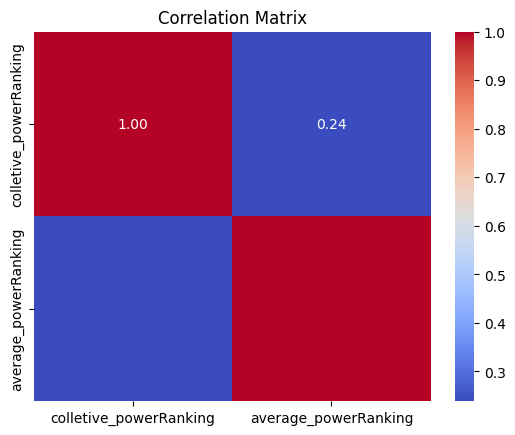

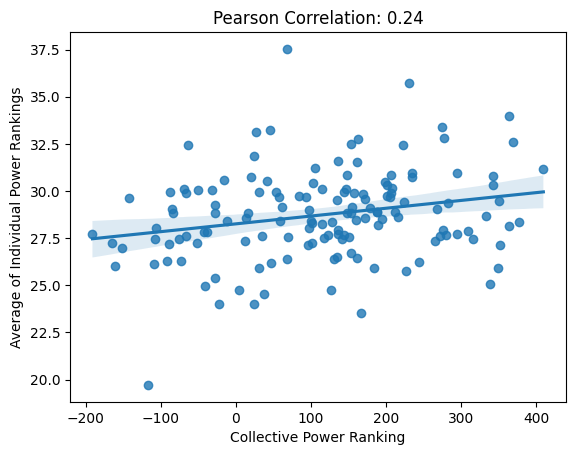

In [9]:
correlation_matrix = feature_engineering_dataset[['powerRanking2', 'average_powerRanking']].corr()
pearson_corr, _ = pearsonr(feature_engineering_dataset['powerRanking2'], feature_engineering_dataset['average_powerRanking'])

correlation_matrix = correlation_matrix.rename(index={'powerRanking2': 'colletive_powerRanking'},
                                               columns={'powerRanking2': 'colletive_powerRanking'})

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Visualize the scatter plot with regression line
sns.regplot(x='powerRanking2', y='average_powerRanking', data=feature_engineering_dataset)
plt.title(f'Pearson Correlation: {pearson_corr:.2f}')
plt.xlabel('Collective Power Ranking')
plt.ylabel('Average of Individual Power Rankings')
plt.show()

### BiSerial correlation
1. **Convert 'playoff' Values:**
   - Ensure 'playoff' column has string values 'Y' and 'N.'
   - Convert 'Y' to 1 and 'N' to 0 in the 'playoff' column.

2. **Handle Non-Numeric Values:**
   - Identify and handle non-numeric values in 'playoff' and 'powerRanking2' columns.

3. **Calculate Biserial Correlation:**
   - Use the point-biserial correlation coefficient to analyze the relationship between 'playoff' and 'powerRanking2.'

4. **Visualize Box Plots:**
   - Create box plots to illustrate the distribution and relationship between 'playoff' and 'powerRanking2,' as well as 'average_powerRanking.'
   - Provide insights into the differences in power rankings for playoff and non-playoff teams.


In [10]:
# Ensure 'playoff' column has string values 'Y' and 'N'
feature_engineering_dataset['playoff'] = feature_engineering_dataset['playoff'].astype(str)

# Convert 'Y' to 1 and 'N' to 0
feature_engineering_dataset['playoff'] = feature_engineering_dataset['playoff'].replace({'Y': 1, 'N': 0})

non_numeric_playoff = feature_engineering_dataset['playoff'].loc[pd.to_numeric(feature_engineering_dataset['playoff'], errors='coerce').isna()]
non_numeric_powerRanking2 = feature_engineering_dataset['powerRanking2'].loc[pd.to_numeric(feature_engineering_dataset['powerRanking2'], errors='coerce').isna()]


print("Non-numeric values in 'playoff':", non_numeric_playoff.unique())
print("Non-numeric values in 'powerRanking2':", non_numeric_powerRanking2.unique())


Non-numeric values in 'playoff': []
Non-numeric values in 'powerRanking2': []


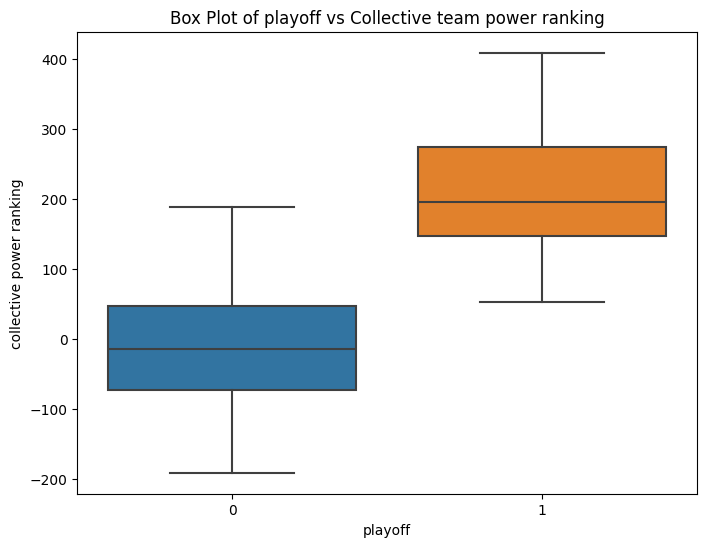

In [11]:
biserial_corr, _ = pointbiserialr(feature_engineering_dataset['playoff'], feature_engineering_dataset['powerRanking2'])

plt.figure(figsize=(8, 6))
sns.boxplot(x='playoff', y='powerRanking2', data=feature_engineering_dataset)
plt.title('Box Plot of playoff vs Collective team power ranking')
plt.xlabel('playoff')
plt.ylabel('collective power ranking')
plt.show()



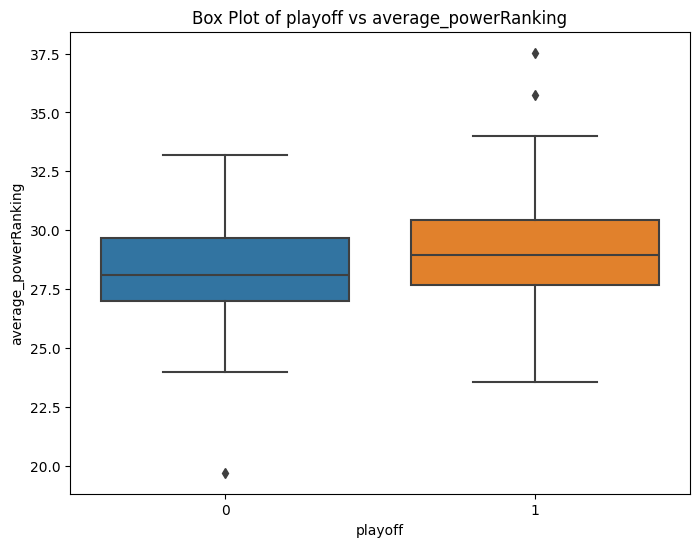

In [12]:
biserial_corr, _ = pointbiserialr(feature_engineering_dataset['playoff'], feature_engineering_dataset['average_powerRanking'])


plt.figure(figsize=(8, 6))
sns.boxplot(x='playoff', y='average_powerRanking', data=feature_engineering_dataset)
plt.title('Box Plot of playoff vs average_powerRanking')
plt.xlabel('playoff')
plt.ylabel('average_powerRanking')
plt.show()
